<h1 style="Comic Sans MS; text-align: center; color: #FFC300">Image Classification System project: Dogs vs. Cats</h1>
<p style="color: pink">The dataset is composed of dog and cat photos provided as a subset of photos from a much larger 3 million manually annotated photos. This data was obtained through a collaboration between Petfinder.com and Microsoft. This is a picture classification problem where we need to build an ANN. The training archive contains 25,000 images of dogs and cats (.jpg format) that can be found <a href="https://www.kaggle.com/c/dogs-vs-cats/data" target="_blank">here</a>. We have to train our algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).</p>

In [34]:
# Load libraries
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam

In [35]:
# We are going to create a CNN model to classify images of cats and dogs
# We need to create a dataset with images of cats and dogs
# We will use the Kaggle dataset of cats and dogs
# https://www.kaggle.com/c/dogs-vs-cats/data

# We have downloaded the dataset and extracted it to the local folder 'C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Deep-Learning-projects/data/raw' and have 2 subfolders:
#  - train (contains 25,000 images of cats and dogs) in 'C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Deep-Learning-projects/data/raw/train/train'
#  - test1 (contains 12,500 images of cats and dogs) in 'C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Deep-Learning-projects/data/raw/test1/test1'
# We will use the 'train' folder to train the model and the 'test1' folder to test the model

In [36]:
# Define paths
train_dir = 'C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Deep-Learning-projects/data/raw/train'
test_dir = 'C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Deep-Learning-projects/data/raw/test1'

In [37]:
# Check if directories exist and contain the expected subdirectories
if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    raise FileNotFoundError("One or both directories do not exist. Please check the paths.")

if not os.path.exists(os.path.join(train_dir, 'cat')) or not os.path.exists(os.path.join(train_dir, 'dog')):
    raise FileNotFoundError("Subdirectories 'cat' and 'dog' do not exist in the training directory.")

# if not os.path.exists(os.path.join(test_dir, 'test1')):
#     raise FileNotFoundError("Subdirectory 'test1' does not exist in the test directory.")

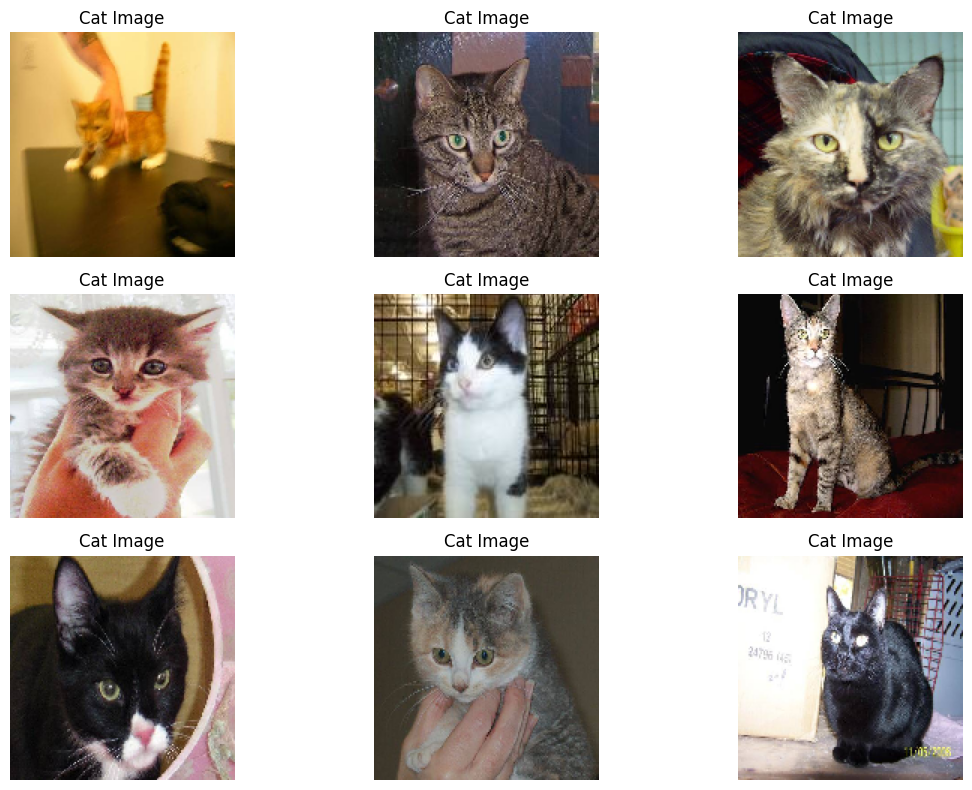

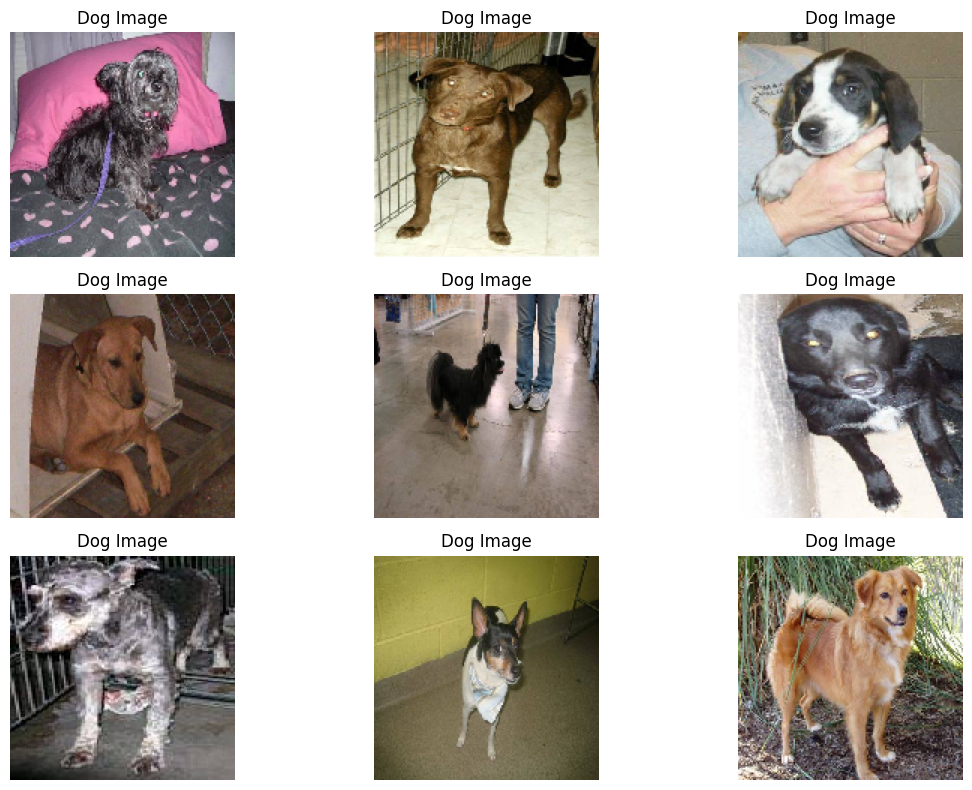

In [38]:
# Get lists of cat and dog image filenames
cat_images = [f for f in os.listdir(os.path.join(train_dir, 'cat')) if 'cat' in f][:9]
dog_images = [f for f in os.listdir(os.path.join(train_dir, 'dog')) if 'dog' in f][:9]

# Function to load and preprocess images
def load_and_preprocess_images(image_list, folder):
    images = []
    for img_file in image_list:
        img_path = os.path.join(folder, img_file)
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Normalize pixel values to [0, 1]
        images.append(img_array)
    return images

# Load the first 9 images of cats and dogs
cat_images = load_and_preprocess_images(cat_images, os.path.join(train_dir, 'cat'))
dog_images = load_and_preprocess_images(dog_images, os.path.join(train_dir, 'dog'))

# Function to display images in a grid
def display_images(images, title):
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the first 9 images of cats and dogs
display_images(cat_images, 'Cat Image')
display_images(dog_images, 'Dog Image')

In [39]:
# Data generators
train_datagen = ImageDataGenerator(validation_split=0.2)
test_datagen = ImageDataGenerator()

# Training and validation data generators
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Test data generator
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [40]:
# Define the CNN model
model = Sequential([
    Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(units=4096, activation="relu"),
    Dense(units=4096, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [41]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 134,268,738 (512.19 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Training the model
history = model.fit(
    train_data, epochs=1
)

 19/625 ━━━━━━━━━━━━━━━━━━━━ 19:43:29 117s/step - accuracy: 0.5231 - loss: 1.6337

In [ ]:
# Evaluation of the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()